In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from matplotlib.pyplot import figure

%matplotlib inline
plt.rcParams["figure.figsize"] = (12,8)

# reading the file
data = pd.read_csv("movies2.csv")

In [2]:
# Lets look at the data
data.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
# Need to see if there is any missing data
data.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [4]:
# Need to remove the null data
# first I will remove it from budget column as it has maximum null values


In [5]:
# Lets check for the budget column now
data1 = data[~data.budget.isnull()]

In [6]:
data1.isnull().sum()

name         0
rating      20
genre        0
year         0
released     0
score        3
votes        3
director     0
writer       0
star         1
country      1
budget       0
gross       61
company      6
runtime      2
dtype: int64

In [7]:
# Removing null values from gross column now

In [8]:
data1 = data1[~data1.gross.isnull()]

In [9]:
# null values of gross column are removed
data1.isnull().sum()

name         0
rating      12
genre        0
year         0
released     0
score        0
votes        0
director     0
writer       0
star         0
country      1
budget       0
gross        0
company      2
runtime      1
dtype: int64

In [10]:
# Need to remove null values from rating column now


In [11]:
data1 = data1[~data1.rating.isnull()]

In [12]:
data1.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     2
runtime     1
dtype: int64

In [13]:
# Insteas of removing these 2 rows with 2 null values, 
# I am going to fill them or replace them with the most common values of company column

data1[data1.company.isnull()]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
633,The Bear,PG,Biography,1984,"September 28, 1984 (United States)",6.1,270.0,Richard C. Sarafian,Michael Kane,Gary Busey,United States,221000.0,2687148.0,NaN,110.0
1572,Heart of Dixie,PG,Drama,1989,"August 25, 1989 (United States)",5.2,677.0,Martin Davidson,Anne Rivers Siddons,Ally Sheedy,United States,8000000.0,1097333.0,NaN,95.0


In [14]:
# The most common company is "Universal Pictures" so I will replace these 2 null values with this compamy name

data1.company.value_counts()

Universal Pictures            330
Columbia Pictures             302
Warner Bros.                  298
Paramount Pictures            279
Twentieth Century Fox         209
                             ... 
Media Rights Capital (MRC)      1
Vegahom Europe                  1
Crystalite Productions          1
Jay Weston Productions          1
Bórd Scannán na hÉireann        1
Name: company, Length: 1475, dtype: int64

In [18]:
data1.company = data1.company.fillna(data1.company.mode()[0])

In [19]:
# Now there is only 1 null value left in runtime column

data1.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     1
dtype: int64

In [21]:
data1[data1.runtime.isnull()]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
6195,One for the Money,PG-13,Action,2012,"January 27, 2012 (United States)",5.3,41000.0,Julie Anne Robinson,Stacy Sherman,Katherine Heigl,United States,40000000.0,38084162.0,Lakeshore Entertainment,NaN


In [ ]:
# Lets remove this one last null value as well

In [23]:
data1 = data1[~data1.runtime.isnull()]

In [24]:
# Now we can see that there is no null value left.

data1.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [25]:
# Now checking the data types of all the columns

data1.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [26]:
# Changing data types of columns

data1.budget = data1.budget.astype("int64")
data1.gross = data1.gross.astype("int64")

C:\Users\lovep\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [27]:
data1.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [36]:
# Creating a correct year column

data1["correctyear"] = data1.released.astype(str).str[-20:-15]

<ipython-input-36-5506a63b43a5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1["correctyear"] = data1.released.astype(str).str[-20:-15]


In [41]:
data1.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctyear
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [94]:
data1 = data1.sort_values(by = ["gross"], inplace = False, ascending = False)

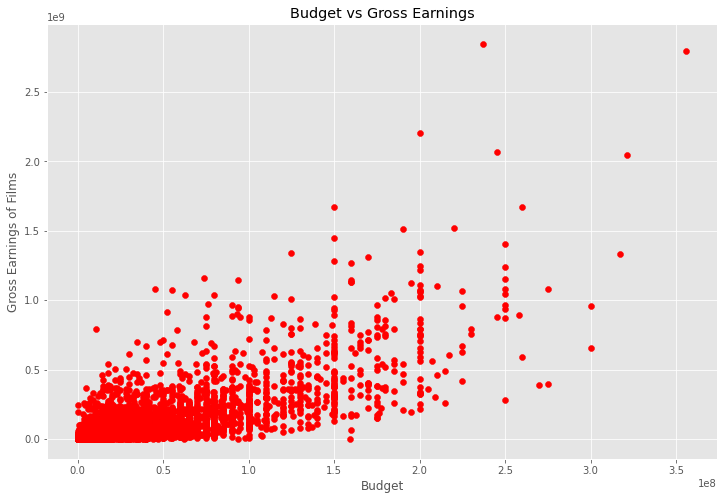

In [103]:
# scatter plot with budget vs gross




plt.scatter(data1.budget, data1.gross, color = "red")

plt.title("Budget vs Gross Earnings")
plt.xlabel("Budget")
plt.ylabel("Gross Earnings of Films")

plt.show()

In [81]:
data1.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctyear
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


C:\Users\lovep\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='budget', ylabel='gross'>

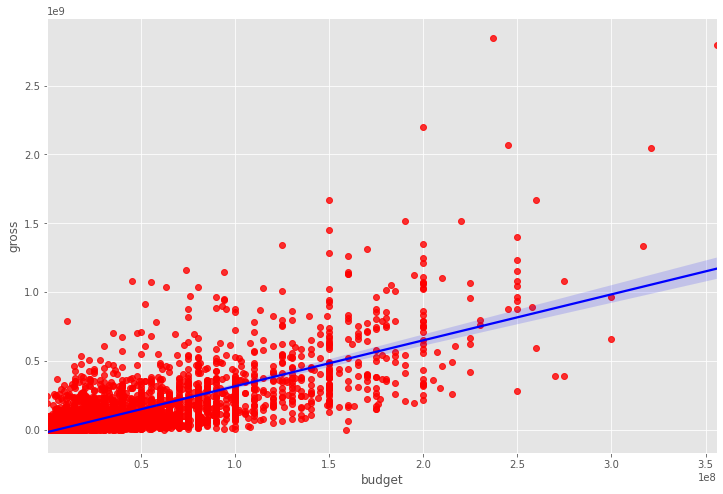

In [87]:
# Plot budget vs gross using seaborn

sns.regplot("budget", "gross", data = data1 , scatter_kws = {"color" : "red"}, line_kws = {"color" : "blue"})

In [ ]:
# Lets look at the correlation


In [88]:
data1.corr()

,year,score,votes,budget,gross,runtime
year,1.000000,0.056723,0.206255,0.327973,0.274485,0.075173
score,0.056723,1.000000,0.474328,0.072184,0.222666,0.414145
votes,0.206255,0.474328,1.000000,0.439771,0.614798,0.352331
budget,0.327973,0.072184,0.439771,1.000000,0.740278,0.318718
gross,0.274485,0.222666,0.614798,0.740278,1.000000,0.275830
runtime,0.075173,0.414145,0.352331,0.318718,0.275830,1.000000


In [ ]:
# It shows the high correlation between budget and gross which is 0.740278
# my hypothesis is correct about this

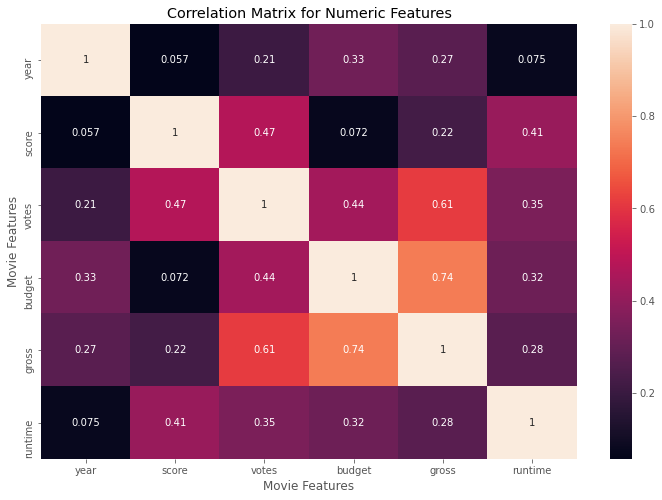

In [90]:
correlation_matrix = data1.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation Matrix for Numeric Features")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")
plt.show()

In [91]:
# Lets look at company now

data1.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctyear
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


In [101]:
# converting all the object types columns into category

data1_numerized = data1

for col_name in data1_numerized.columns:
    if (data1_numerized[col_name].dtype == "object"):
        data1_numerized[col_name] = data1_numerized[col_name].astype("category")
        data1_numerized[col_name] = data1_numerized[col_name].cat.codes
    
data1_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctyear
5445,386,5,0,2009,527,7.8,1100000.0,785,1264,1534,47,237000000,2847246203,1382,162.0,69
7445,388,5,0,2019,137,8.4,903000.0,105,514,1470,47,356000000,2797501328,983,181.0,79
3045,4911,5,6,1997,534,7.8,1100000.0,785,1264,1073,47,200000000,2201647264,1382,194.0,56
6663,3644,5,0,2015,529,7.8,876000.0,768,1807,356,47,245000000,2069521700,945,138.0,75
7244,389,5,0,2018,145,8.4,897000.0,105,514,1470,47,321000000,2048359754,983,149.0,78


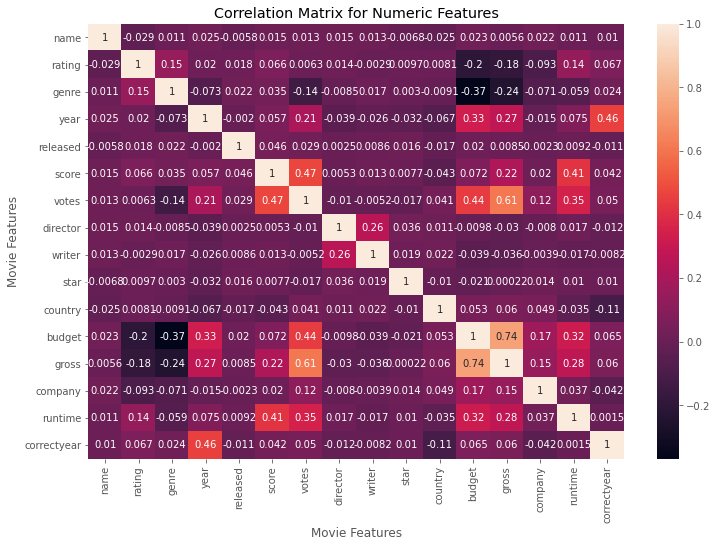

In [96]:
# Now finding the correlation among all the given data.

correlation_matrix = data1_numerized.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation Matrix for Numeric Features")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")
plt.show()

In [97]:
data1_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctyear
name,1.000000,-0.029267,0.010868,0.025425,-0.005776,0.014546,0.012593,0.015319,0.013117,-0.006790,-0.025474,0.023333,0.005620,0.021730,0.010950,0.010132
rating,-0.029267,1.000000,0.147542,0.020126,0.017994,0.066298,0.006306,0.014381,-0.002919,0.009697,0.008075,-0.203528,-0.181606,-0.092817,0.140886,0.067083
genre,0.010868,0.147542,1.000000,-0.073320,0.021856,0.034871,-0.136069,-0.008505,0.017259,0.003046,-0.009106,-0.368554,-0.244154,-0.071122,-0.059367,0.024015
year,0.025425,0.020126,-0.073320,1.000000,-0.001957,0.056723,0.206255,-0.038682,-0.025712,-0.031577,-0.066902,0.327973,0.274485,-0.014928,0.075173,0.456977
released,-0.005776,0.017994,0.021856,-0.001957,1.000000,0.046049,0.028779,0.002500,0.008586,0.015888,-0.017199,0.019843,0.008465,-0.002333,0.009172,-0.011202
score,0.014546,0.066298,0.034871,0.056723,0.046049,1.000000,0.474328,0.005299,0.013166,0.007702,-0.043141,0.072184,0.222666,0.020324,0.414145,0.042397
votes,0.012593,0.006306,-0.136069,0.206255,0.028779,0.474328,1.000000,-0.010498,-0.005194,-0.017371,0.041469,0.439771,0.614798,0.118172,0.352331,0.049934
director,0.015319,0.014381,-0.008505,-0.038682,0.002500,0.005299,-0.010498,1.000000,0.261629,0.036371,0.011208,-0.009815,-0.029663,-0.007976,0.017437,-0.012183
writer,0.013117,-0.002919,0.017259,-0.025712,0.008586,0.013166,-0.005194,0.261629,1.000000,0.018922,0.022420,-0.039334,-0.035762,-0.003911,-0.017339,-0.008222
star,-0.006790,0.009697,0.003046,-0.031577,0.015888,0.007702,-0.017371,0.036371,0.018922,1.000000,-0.010131,-0.021161,0.000223,0.013597,0.010312,0.010117


In [98]:
correlation_mat = data1_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

name         name           1.000000
             rating        -0.029267
             genre          0.010868
             year           0.025425
             released      -0.005776
                              ...   
correctyear  budget         0.065162
             gross          0.060248
             company       -0.042471
             runtime        0.001526
             correctyear    1.000000
Length: 256, dtype: float64

In [100]:
high_correlation = corr_pairs[corr_pairs > 0.5]
high_correlation

name         name           1.000000
rating       rating         1.000000
genre        genre          1.000000
year         year           1.000000
released     released       1.000000
score        score          1.000000
votes        votes          1.000000
             gross          0.614798
director     director       1.000000
writer       writer         1.000000
star         star           1.000000
country      country        1.000000
budget       budget         1.000000
             gross          0.740278
gross        votes          0.614798
             budget         0.740278
             gross          1.000000
company      company        1.000000
runtime      runtime        1.000000
correctyear  correctyear    1.000000
dtype: float64

In [ ]:
# votes and budget have the highest correlation to gross earnings
# company has low correlation and I was wrong for this as per my hypothesis